# Homework 05  Yifan (Crystal) CAI

In [1]:
# !pip install kneed

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler, normalize, scale
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from kneed import KneeLocator

#### The Madelon dataset is a synthetic dataset that was generated for a machine learning competition. It is a high-dimensional dataset, with 500 features and 2,600 data points. It has a highly non-linear structure, and in this homework assignment, you’ll be diving into it further with PCA and k-means clustering. When you are asked to generate a plot, please provide the image in your final writeup along with a brief analysis of its major features.

#### 1. Before performing any dimensionality reduction, write a program to use k-means clustering on the Madelon dataset. Try the following k values: 4, 8, 16, 32, 64. 

1). What preprocessing techniques did you apply, if any?

In [3]:
# Import Dataset
madelon = pd.read_csv("/Users/crystal/Desktop/ML/assign05_0219/madelon.csv")
madelon = madelon.drop(madelon.columns[[0]], axis = 1)
madelon.head()
madelon.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V491,V492,V493,V494,V495,V496,V497,V498,V499,V500
count,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,...,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000
mean,481.742308,483.551154,509.338846,483.364615,500.925769,479.351923,480.488462,476.569615,487.016154,478.806538,...,482.255000,478.803462,486.250769,497.734615,493.812308,510.731538,478.151154,483.157308,508.436538,490.588077
std,6.312905,30.338955,38.798710,8.943204,41.356829,6.896949,40.428218,1.391642,15.277242,7.308349,...,20.857658,4.034889,23.682591,127.455585,34.883461,37.701112,5.863052,13.607801,37.030636,25.926791
min,462.000000,377.000000,370.000000,453.000000,360.000000,459.000000,334.000000,471.000000,430.000000,455.000000,...,407.000000,463.000000,391.000000,103.000000,368.000000,353.000000,457.000000,435.000000,363.000000,403.000000
25%,478.000000,464.000000,484.000000,477.000000,474.000000,475.000000,453.000000,476.000000,477.000000,474.000000,...,468.000000,476.000000,471.000000,405.750000,470.000000,486.000000,474.000000,474.000000,483.000000,473.000000
50%,482.000000,484.000000,509.000000,483.000000,500.000000,479.000000,481.000000,477.000000,487.000000,479.000000,...,482.000000,479.000000,486.000000,505.500000,493.000000,510.000000,478.000000,483.000000,508.000000,491.000000
75%,486.000000,504.000000,535.000000,489.000000,527.000000,484.000000,507.000000,477.000000,497.000000,484.000000,...,496.000000,481.000000,502.000000,586.250000,517.000000,536.000000,482.000000,492.000000,533.000000,508.000000
max,503.000000,610.000000,654.000000,519.000000,688.000000,505.000000,611.000000,482.000000,547.000000,505.000000,...,549.000000,497.000000,571.000000,920.000000,615.000000,661.000000,500.000000,535.000000,644.000000,593.000000


In [4]:
# Scale Data
madelon_scale = pd.DataFrame(scale(madelon,axis=0))
madelon_scale.describe()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
count,2.600000e+03,2.600000e+03,2.600000e+03,2.600000e+03,2.600000e+03,2.600000e+03,2.600000e+03,2.600000e+03,2.600000e+03,2.600000e+03,...,2.600000e+03,2.600000e+03,2.600000e+03,2.600000e+03,2.600000e+03,2.600000e+03,2.600000e+03,2.600000e+03,2.600000e+03,2.600000e+03
mean,2.787514e-16,-1.988153e-16,5.014792e-16,8.936441e-16,2.657703e-16,7.679327e-16,6.695499e-17,1.721973e-14,1.243450e-15,-2.531992e-15,...,2.247775e-16,1.213388e-15,9.564998e-16,2.459571e-17,2.445907e-16,7.105427e-16,4.805728e-15,-1.366428e-15,-3.853328e-16,-1.147800e-16
std,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,...,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00
min,-3.127895e+00,-3.512700e+00,-3.592018e+00,-3.395926e+00,-3.408213e+00,-2.951426e+00,-3.624118e+00,-4.002959e+00,-3.732815e+00,-3.258071e+00,...,-3.608721e+00,-3.917457e+00,-4.022748e+00,-3.097632e+00,-3.607340e+00,-4.184542e+00,-3.608227e+00,-3.539629e+00,-3.928221e+00,-3.378934e+00
25%,-5.929168e-01,-6.445481e-01,-6.532104e-01,-7.118075e-01,-6.511850e-01,-6.311139e-01,-6.800633e-01,-4.093904e-01,-6.557519e-01,-6.578043e-01,...,-6.835735e-01,-6.949388e-01,-6.440893e-01,-7.218382e-01,-6.827559e-01,-6.561158e-01,-7.081555e-01,-6.730749e-01,-6.870374e-01,-6.785051e-01
50%,4.082778e-02,1.479723e-02,-8.735119e-03,-4.077795e-02,-2.238922e-02,-5.103572e-02,1.265544e-02,3.093234e-01,-1.057583e-03,2.647640e-02,...,-1.222808e-02,4.871913e-02,-1.059079e-02,6.093792e-02,-2.329081e-02,-1.940736e-02,-2.578571e-02,-1.156234e-02,-1.179084e-02,1.589099e-02
75%,6.745724e-01,6.741425e-01,6.615192e-01,6.302516e-01,6.305911e-01,6.740620e-01,6.558943e-01,3.093234e-01,6.536367e-01,7.107571e-01,...,6.591173e-01,5.444911e-01,6.651409e-01,6.946138e-01,6.648467e-01,6.703601e-01,6.565841e-01,6.499502e-01,6.634557e-01,6.717095e-01
max,3.367987e+00,4.168673e+00,3.729221e+00,3.985399e+00,4.524288e+00,3.719472e+00,3.228850e+00,3.902892e+00,3.927108e+00,3.584736e+00,...,3.200639e+00,4.510667e+00,3.579234e+00,3.313677e+00,3.474741e+00,3.986550e+00,3.727248e+00,3.810510e+00,3.661550e+00,3.950802e+00


2). Describe qualitatively: how does the number of clusters affect the performance of the clustering algorithm on the dataset? 

**Answer :** <br>
When the number of clusters is too low, the algorithm may group together data points that are actually dissimilar, resulting in low homogeneity scores and a lack of separation between clusters. <br>
When the number of clusters is too high, the algorithm may overfit to noise in the data, resulting in high variance and a lack of generalization to new data.

3). Generate a plot of the number of clusters k (x-axis) versus the sum of squared distance (SSE) between data points and their assigned centroids (y-axis). What appears to be the optimal k from the list of values you used, and why? 

In [5]:
# Run k-means clustering for each k value and calculate the SSE
SSE_values = []
k_values = [4,8,16,32,64]
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(madelon_scale)
    SSE_values.append(kmeans.inertia_)
    print("For k = {}, SSE = {}".format(k, kmeans.inertia_))

For k = 4, SSE = 1277829.449796134
For k = 8, SSE = 1268382.048714304
For k = 16, SSE = 1260483.2210398829
For k = 32, SSE = 1250937.1099298715
For k = 64, SSE = 1233582.3162810234


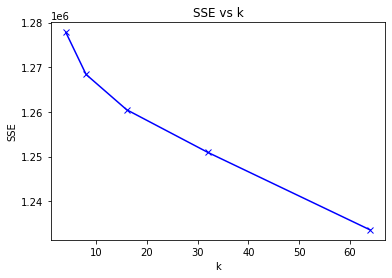

In [6]:
# Plot SSE vs k
plt.plot(k_values, SSE_values, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('SSE vs k')
plt.show()

In [7]:
# Use elbow method to select K
k_optimal = KneeLocator(k_values, SSE_values, curve = 'convex', direction = 'decreasing')
k_optimal.elbow

/opt/anaconda3/lib/python3.8/site-packages/kneed/knee_locator.py:311: UserWarning: No knee/elbow found
  warnings.warn("No knee/elbow found")


**Answer:**
Based on the elbow method, it's hard to find a optimal K in this case.

4). For k = 8, how did you initialize the set of cluster centroids before running k-means? Rerun k-means again, this time ensuring that the centroids are all different. Does this – and if so, to what extent – affect the final clusters created?

In [8]:
kmeans_8_original = KMeans(n_clusters=8, init='k-means++',n_init=10, random_state=16).fit(madelon_scale)
print(kmeans_8_original.inertia_)
kmeans_8_random = KMeans(n_clusters=8, init='random', n_init=10, random_state=16).fit(madelon_scale)
print(kmeans_8_random.inertia_)
print('I initialized the set of cluster centroids before running k-means by setting init to "k-means++", and now I set init to "random" to ensure the centroids are all different. This makes SSE become larger.')

1268517.4922842695
1268602.6551576864
I initialized the set of cluster centroids before running k-means by setting init to "k-means++", and now I set init to "random" to ensure the centroids are all different. This makes SSE become larger.


**Answer :** <br>
We found that this increases the SSE when we set centroids all to be different. 

5). More generally for any dataset, what evaluation metrics can be used to assess the quality of the clusters produced?

**Answer :** <br>
Besides SSE, there are following evaluation metrics that can be used to assess the quality of the clusters produced: <br>
1. Silhouette Score: The Silhouette score measures how similar an object is to its own cluster compared to other clusters. It ranges from -1 to 1, where a score closer to 1 indicates that the object is well-matched to its cluster, and a score closer to -1 indicates that it would be better placed in another cluster.

2. Calinski-Harabasz Index: The Calinski-Harabasz Index measures the ratio of the between-cluster variance to the within-cluster variance. A higher value of this index indicates that the clusters are more separated.

3. Davies-Bouldin Index: The Davies-Bouldin Index measures the average similarity between each cluster and its most similar cluster. A lower value of this index indicates that the clusters are more separated.


#### 2. The Madelon dataset is high-dimensional, with 500 features per data point. Some of these features might be redundant or noisy, making clustering more difficult. 

1). Fit the standardized data with PCA. Then, create a cumulative variance plot – showing the number of components included (x-axis) versus the amount of variance captured (y-axis). Generally, we want to retain at least 75% of the variance. How many components would you decide to keep?

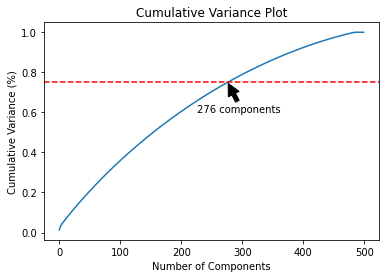

I decide to keep 276 components


In [9]:
# PCA 
pca = PCA().fit(madelon_scale)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance (%)')
plt.title('Cumulative Variance Plot')

# Annotate the plot with the 75% variance point
cumulative_var = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_var >= 0.75)
plt.axhline(y=0.75, color='r', linestyle='--')
plt.annotate(f'{num_components} components', xy=(num_components, 0.75), 
             xytext=(num_components-50, 0.6), 
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()
print("I decide to keep {} components".format(num_components))

2). Perform PCA with your selected principal components.

In [10]:
# Fit PCA on the selected number of components
pca = PCA(n_components=num_components)
madelon_pca = pca.fit_transform(madelon_scale)

a). Plot the transformed data on a graph with the first two principal components as the axes i.e. x = PC 1, y = PC 2.

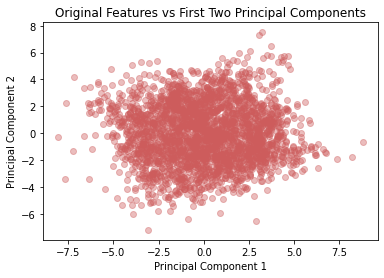

In [11]:
# Scatter Plot
plt.scatter(madelon_pca[:,0], madelon_pca[:,1], alpha = 0.4, c = 'indianred')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Original Features vs First Two Principal Components')
plt.show()

b). Plot the original data on a graph with the two original variables that have the highest absolute combined loading for PC 1 and PC 2 i.e. maximizing |loading PC1| + |loading PC2|.

<ipython-input-12-dc1878694d0c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loading_matrix_PC12['ABS_Combined'] = np.abs(loading_matrix['PC1']) + np.abs(loading_matrix['PC2'])


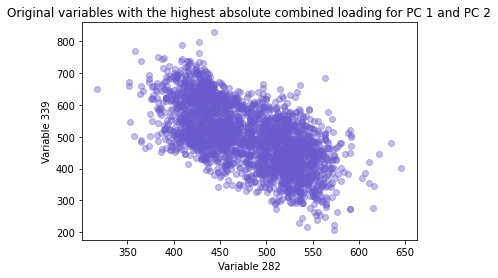

In [12]:
# Find the two original variables with the highest absolute combined loading for PC 1 and PC 2
loadings = pca.components_.T
loading_matrix = pd.DataFrame(loadings, index=madelon_scale.columns)
listnames = []
for i in range(1,loading_matrix.shape[1]+1):
    listname = 'PC'+ str(i)
    listnames.append(listname)
loading_matrix.columns = listnames

# Take all variables with the highest absolute combined loading for PC 1 and PC 2
loading_matrix_PC12 = loading_matrix[['PC1','PC2']]
loading_matrix_PC12['ABS_Combined'] = np.abs(loading_matrix['PC1']) + np.abs(loading_matrix['PC2'])
top_var_idx = loading_matrix_PC12.sort_values(by = 'ABS_Combined',ascending = True)[-2:].index.tolist()
top_var_idx

# Plot the original data on a graph with the two selected variables
plt.scatter(madelon.iloc[:,top_var_idx[0]], madelon.iloc[:,top_var_idx[1]], alpha = 0.4, c='SlateBlue')
plt.xlabel(f'Variable {top_var_idx[0]+1}')
plt.ylabel(f'Variable {top_var_idx[1]+1}')
plt.title('Original variables with the highest absolute combined loading for PC 1 and PC 2')
plt.show()

#### 3. Now, we will run k-means clustering on the transformed data from the previous problem.

1). Why is it a good idea to do this, especially for high-dimensional datasets? Name a number of reasons.

**Answer :** <br>
Dimensionality reduction: High-dimensional data can be difficult to visualize and process, but PCA can be used to reduce the number of dimensions to a manageable level while preserving the important features of the data.

1. Feature selection: PCA can also help identify the most important features of the data, which can be used to improve the accuracy of clustering and reduce the impact of noisy or irrelevant features.

2. Improved clustering performance: By reducing the number of dimensions, PCA can help improve the performance of clustering algorithms such as k-means by reducing the curse of dimensionality and improving the clustering of similar data points.

3. Faster computation: Reducing the number of dimensions can also lead to faster computation times, making clustering more efficient and scalable for large datasets.

2). Use the same k values again (4, 8, 16, 32, 64) to again generate an elbow plot.

a). What is the optimal k? Is it different from the one you found in (1)

In [13]:
# Run k-means clustering for each k value and calculate the SSE
SSE_values_pca = []
k_values = [4,8,16,32,64]
for k in k_values:
    kmeans_pca = KMeans(n_clusters=k, random_state=0).fit(madelon_pca)
    SSE_values_pca.append(kmeans_pca.inertia_)
    print("For k = {}, SSE = {}".format(k, kmeans_pca.inertia_))

For k = 4, SSE = 940004.1041066395
For k = 8, SSE = 930151.3622165071
For k = 16, SSE = 922473.6164986123
For k = 32, SSE = 912726.3986005604
For k = 64, SSE = 898243.3471356187


b).Compare the SSE values plotted in this exercise to the previous plot you generated in (1c) before performing PCA.

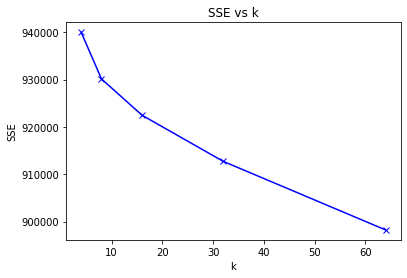

In [14]:
# Plot SSE vs K
plt.plot(k_values, SSE_values_pca, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('SSE vs k')
plt.show()

In [15]:
# Use elbow method to select K
k_optimal_pca = KneeLocator(k_values, SSE_values_pca, curve = 'convex', direction = 'decreasing')
k_optimal_pca.elbow

/opt/anaconda3/lib/python3.8/site-packages/kneed/knee_locator.py:311: UserWarning: No knee/elbow found
  warnings.warn("No knee/elbow found")


**Answer :** <br>
The SSE of K-means with different K has decreased but the selection of optimal K is still hard to decide.

3). Again, create a scatter plot of PC 1 (x-axis) versus PC 2 (y-axis) for all of the transformed data points. Label the cluster centers and color-code by cluster assignment for the first 5 iterations of k = 32. Can you see the algorithm begin to converge to optimal assignments?

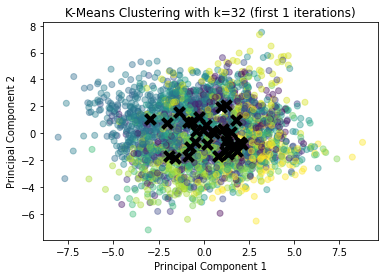

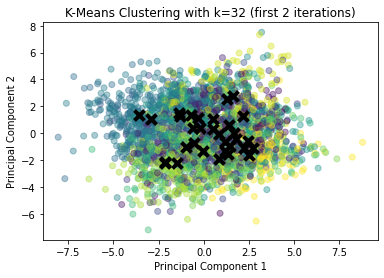

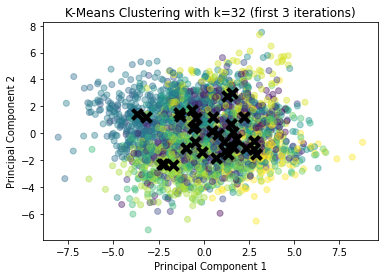

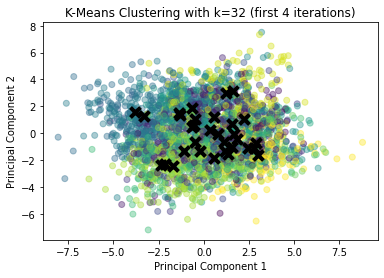

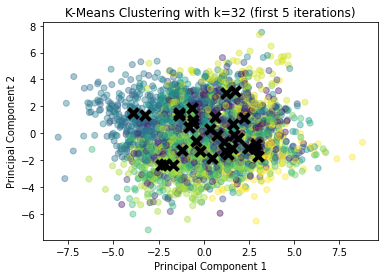

In [16]:
# Perform k-means clustering on the transformed data with k=32
k = 32
for i in range(1,6):
    kmeans_pca_32 = KMeans(n_clusters=k, random_state = 0, max_iter=i)
    kmeans_pca_32.fit(madelon_pca)
    cluster_assignments = kmeans_pca_32.predict(madelon_pca)
    # Get the cluster centers
    cluster_centers = kmeans_pca_32.cluster_centers_
    # Create a scatter plot of PC1 vs PC2 with the labeled cluster centers and color-coded cluster assignments
    plt.scatter(madelon_pca[:,0], madelon_pca[:,1], c=cluster_assignments, alpha=0.4)
    plt.scatter(cluster_centers[:,0], cluster_centers[:,1], marker='x', s=100, linewidth=4, c='black')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title("K-Means Clustering with k=32 (first {} iterations)".format(i))
    plt.show()

**Answer :** <br>
We can find that from iteration of 1 to 5, the algorithm begins to converge to optimal assignments as the clusters are not gathered tightly any more. 